In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv("C:\\Users\\kiran\\Desktop\\Future Forecasting\\Employee.csv")
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [6]:
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [7]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [8]:
df['Education'].value_counts()

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

In [9]:
df['Education'].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

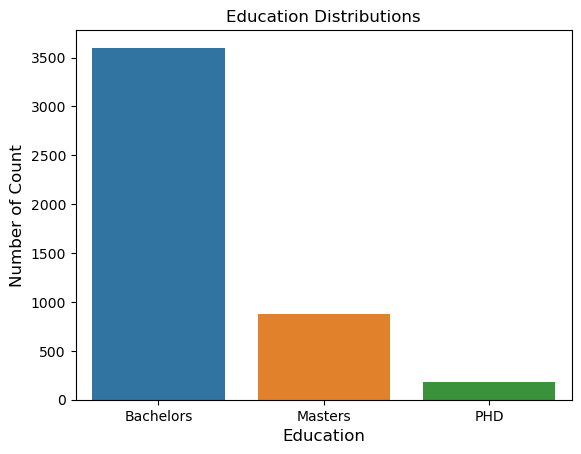

In [10]:
sns.countplot(x=df['Education'])
plt.title("Education Distributions")
plt.xlabel("Education",fontsize=12)
plt.ylabel("Number of Count",fontsize=12)
plt.show()

In [11]:
oe = OrdinalEncoder(categories=[['Bachelors', 'Masters', 'PHD']])

df['Education'] = oe.fit_transform(df[['Education']])

In [12]:
df['Education'].value_counts()

0.0    3601
1.0     873
2.0     179
Name: Education, dtype: int64

In [13]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0.0,2017,Bangalore,3,34,Male,No,0,0
1,0.0,2013,Pune,1,28,Female,No,3,1
2,0.0,2014,New Delhi,3,38,Female,No,2,0
3,1.0,2016,Bangalore,3,27,Male,No,5,1
4,1.0,2017,Pune,3,24,Male,Yes,2,1


In [14]:
df['City'].value_counts()

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64

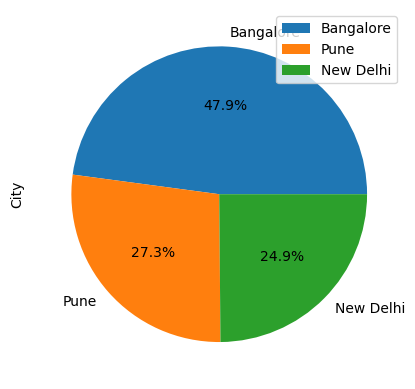

In [15]:
df['City'].value_counts().plot(kind='pie', autopct="%.1f%%")
plt.legend()
plt.show()

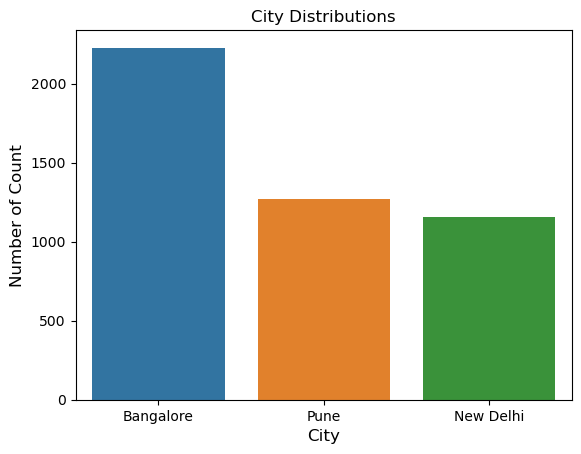

In [16]:
sns.countplot(x=df['City'])
plt.title("City Distributions")
plt.xlabel("City",fontsize=12)
plt.ylabel("Number of Count",fontsize=12)
plt.show()

In [17]:
df['City'].unique()

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

In [18]:
city = pd.get_dummies(df['City'],prefix="City",dtype="int")
city.head()

,City_Bangalore,City_New Delhi,City_Pune
0,1,0,0
1,0,0,1
2,0,1,0
3,1,0,0
4,0,0,1


In [19]:
df['Gender'].value_counts()

Male      2778
Female    1875
Name: Gender, dtype: int64

In [20]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

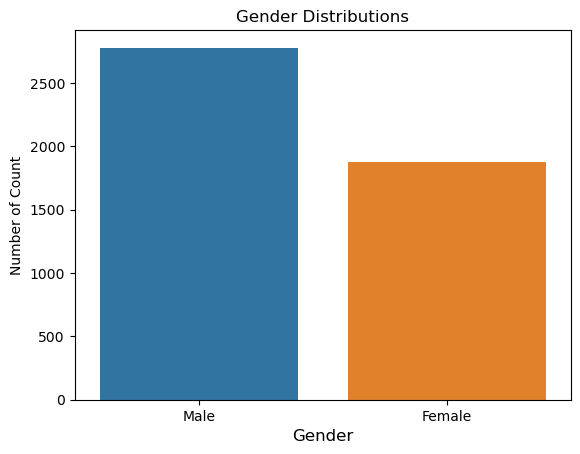

In [21]:
sns.countplot(x=df['Gender'])
plt.title("Gender Distributions")
plt.xlabel("Gender",fontsize=12)
plt.ylabel("Number of Count")
plt.show()

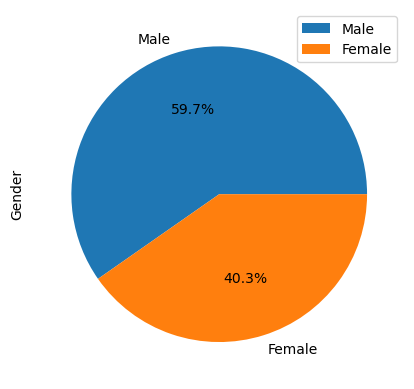

In [22]:
df['Gender'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.legend()
plt.show()

In [23]:
gender = pd.get_dummies(df['Gender'],prefix='Gender',dtype='int')
gender

,Gender_Female,Gender_Male
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
4648,1,0
4649,0,1
4650,0,1
4651,0,1


In [24]:
df['PaymentTier'].value_counts()

3    3492
2     918
1     243
Name: PaymentTier, dtype: int64

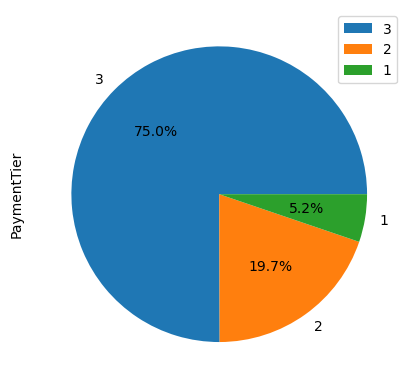

In [25]:
df['PaymentTier'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.legend()
plt.show()

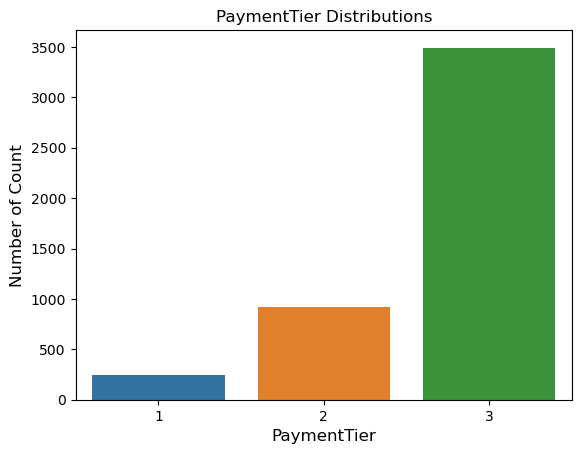

In [26]:
sns.countplot(x=df['PaymentTier'])
plt.title("PaymentTier Distributions")
plt.xlabel("PaymentTier",fontsize=12)
plt.ylabel("Number of Count",fontsize=12)
plt.show()

In [27]:
df['Age'].unique()

array([34, 28, 38, 27, 24, 22, 23, 37, 32, 39, 29, 30, 36, 31, 25, 26, 40,
       35, 33, 41], dtype=int64)

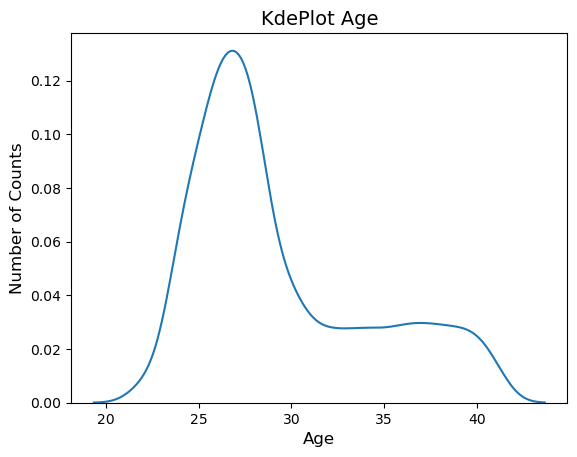

In [28]:
sns.kdeplot(df['Age'])
plt.title("KdePlot Age",fontsize=14)
plt.xlabel("Age",fontsize=12)
plt.ylabel("Number of Counts",fontsize=12)
plt.show()

In [29]:
df['EverBenched'].value_counts()

No     4175
Yes     478
Name: EverBenched, dtype: int64

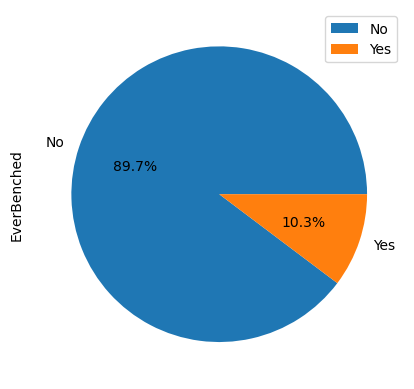

In [30]:
df['EverBenched'].value_counts().plot(kind="pie",autopct='%.1f%%')
plt.legend()
plt.show()

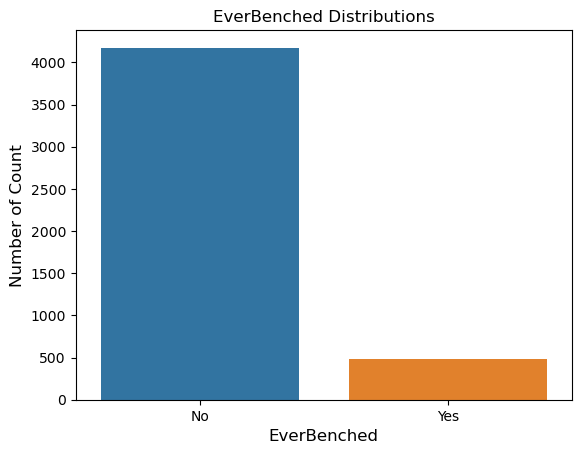

In [31]:
sns.countplot(x=df['EverBenched'])
plt.title("EverBenched Distributions")
plt.xlabel("EverBenched",fontsize=12)
plt.ylabel("Number of Count",fontsize=12)
plt.show()

In [32]:
everbenched = pd.get_dummies(df['EverBenched'],prefix='EverBenched',dtype='int')
everbenched

,EverBenched_No,EverBenched_Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
4648,1,0
4649,1,0
4650,1,0
4651,0,1


In [33]:
df['ExperienceInCurrentDomain'].unique()

array([0, 3, 2, 5, 1, 4, 7, 6], dtype=int64)

In [34]:
df['ExperienceInCurrentDomain'].value_counts()

2    1087
4     931
5     919
3     786
1     558
0     355
7       9
6       8
Name: ExperienceInCurrentDomain, dtype: int64

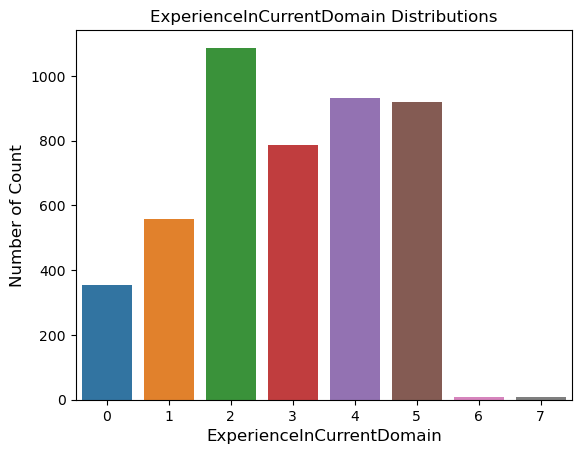

In [35]:
sns.countplot(x=df['ExperienceInCurrentDomain'])
plt.title("ExperienceInCurrentDomain Distributions")
plt.xlabel("ExperienceInCurrentDomain",fontsize=12)
plt.ylabel("Number of Count",fontsize=12)
plt.show()

In [36]:
df['LeaveOrNot'].value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

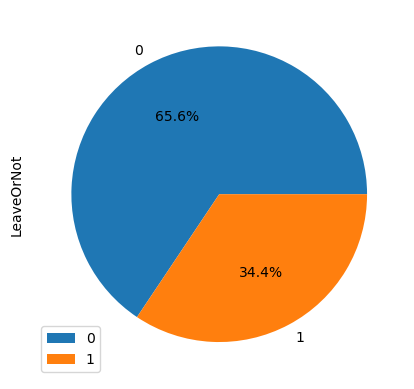

In [37]:
df['LeaveOrNot'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.legend()
plt.show()

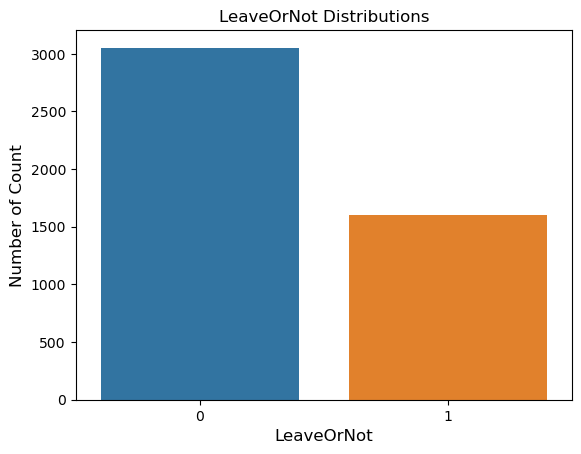

In [38]:
sns.countplot(x=df['LeaveOrNot'])
plt.title("LeaveOrNot Distributions")
plt.xlabel("LeaveOrNot",fontsize=12)
plt.ylabel("Number of Count",fontsize=12)
plt.show()

In [39]:
df['JoiningYear'].unique()

array([2017, 2013, 2014, 2016, 2015, 2012, 2018], dtype=int64)

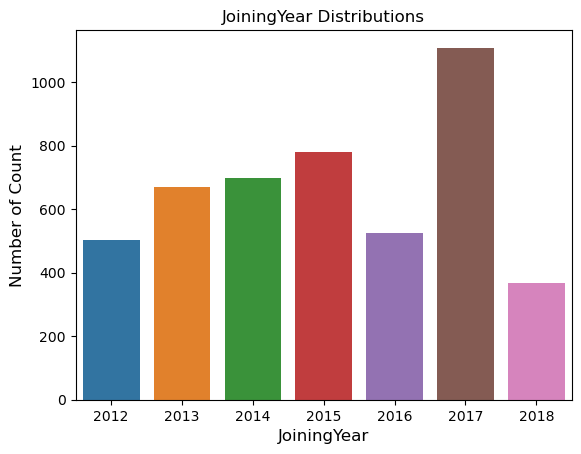

In [40]:
sns.countplot(x=df['JoiningYear'])
plt.title("JoiningYear Distributions")
plt.xlabel("JoiningYear",fontsize=12)
plt.ylabel("Number of Count",fontsize=12)
plt.show()

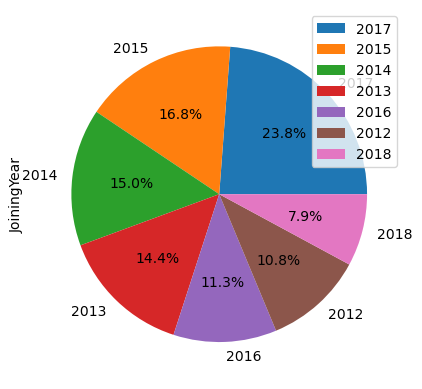

In [41]:
df['JoiningYear'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.legend()
plt.show()

In [42]:
df1 = pd.concat([df,city,gender,everbenched],axis=1)
df1

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,0.0,2017,Bangalore,3,34,Male,No,0,0,1,0,0,0,1,1,0
1,0.0,2013,Pune,1,28,Female,No,3,1,0,0,1,1,0,1,0
2,0.0,2014,New Delhi,3,38,Female,No,2,0,0,1,0,1,0,1,0
3,1.0,2016,Bangalore,3,27,Male,No,5,1,1,0,0,0,1,1,0
4,1.0,2017,Pune,3,24,Male,Yes,2,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,0.0,2013,Bangalore,3,26,Female,No,4,0,1,0,0,1,0,1,0
4649,1.0,2013,Pune,2,37,Male,No,2,1,0,0,1,0,1,1,0
4650,1.0,2018,New Delhi,3,27,Male,No,5,1,0,1,0,0,1,1,0
4651,0.0,2012,Bangalore,3,30,Male,Yes,2,0,1,0,0,0,1,0,1


In [43]:
df1 = df1.drop(['City','Gender','EverBenched'],axis=1)
df1

,Education,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,0.0,2017,3,34,0,0,1,0,0,0,1,1,0
1,0.0,2013,1,28,3,1,0,0,1,1,0,1,0
2,0.0,2014,3,38,2,0,0,1,0,1,0,1,0
3,1.0,2016,3,27,5,1,1,0,0,0,1,1,0
4,1.0,2017,3,24,2,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,0.0,2013,3,26,4,0,1,0,0,1,0,1,0
4649,1.0,2013,2,37,2,1,0,0,1,0,1,1,0
4650,1.0,2018,3,27,5,1,0,1,0,0,1,1,0
4651,0.0,2012,3,30,2,0,1,0,0,0,1,0,1


In [44]:
x = df1.drop('LeaveOrNot',axis=1)
y = df1['LeaveOrNot']

In [45]:
x

,Education,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,0.0,2017,3,34,0,1,0,0,0,1,1,0
1,0.0,2013,1,28,3,0,0,1,1,0,1,0
2,0.0,2014,3,38,2,0,1,0,1,0,1,0
3,1.0,2016,3,27,5,1,0,0,0,1,1,0
4,1.0,2017,3,24,2,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4648,0.0,2013,3,26,4,1,0,0,1,0,1,0
4649,1.0,2013,2,37,2,0,0,1,0,1,1,0
4650,1.0,2018,3,27,5,0,1,0,0,1,1,0
4651,0.0,2012,3,30,2,1,0,0,0,1,0,1


In [46]:
y

0       0
1       1
2       0
3       1
4       1
       ..
4648    0
4649    1
4650    1
4651    0
4652    0
Name: LeaveOrNot, Length: 4653, dtype: int64

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,test_size=0.10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4187, 12)
(466, 12)
(4187,)
(466,)


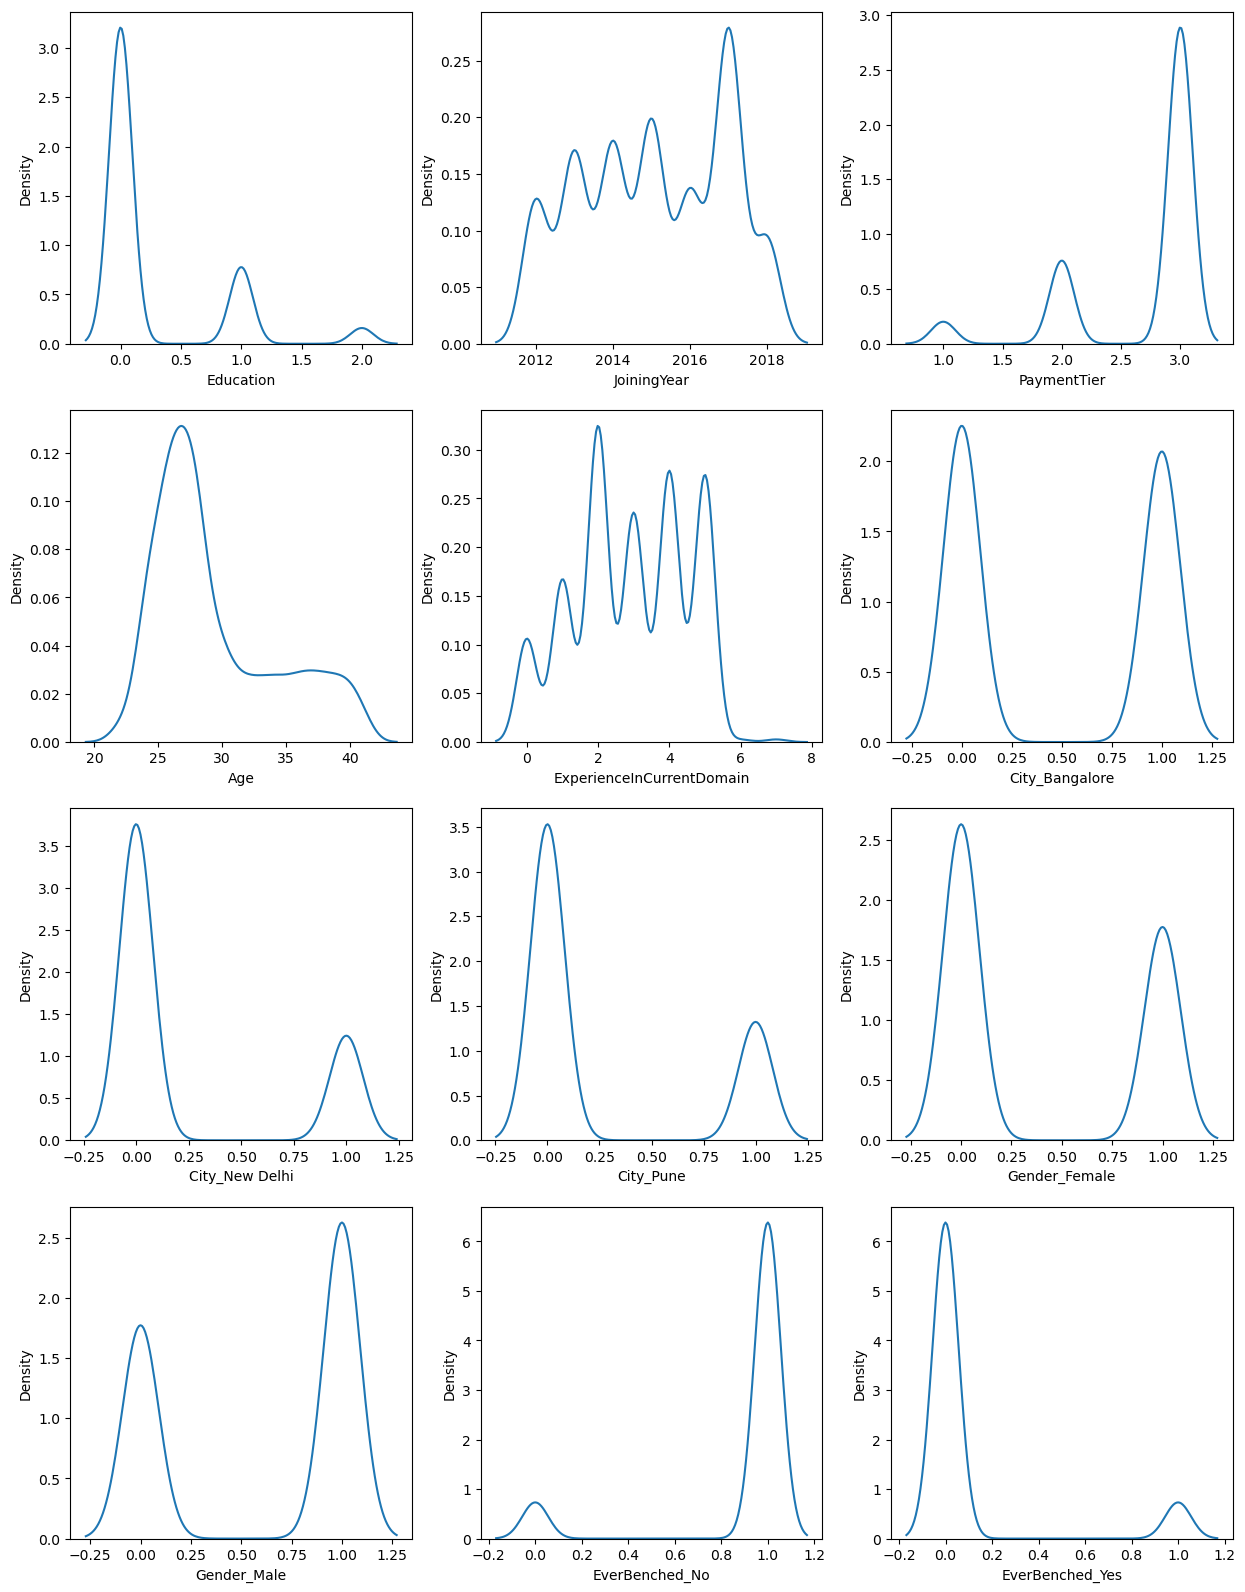

In [48]:
plt.figure(figsize=(15,25))
i=1
for col in x.columns:
    plt.subplot(5,3,i)
    sns.kdeplot(x[col])
    i+=1

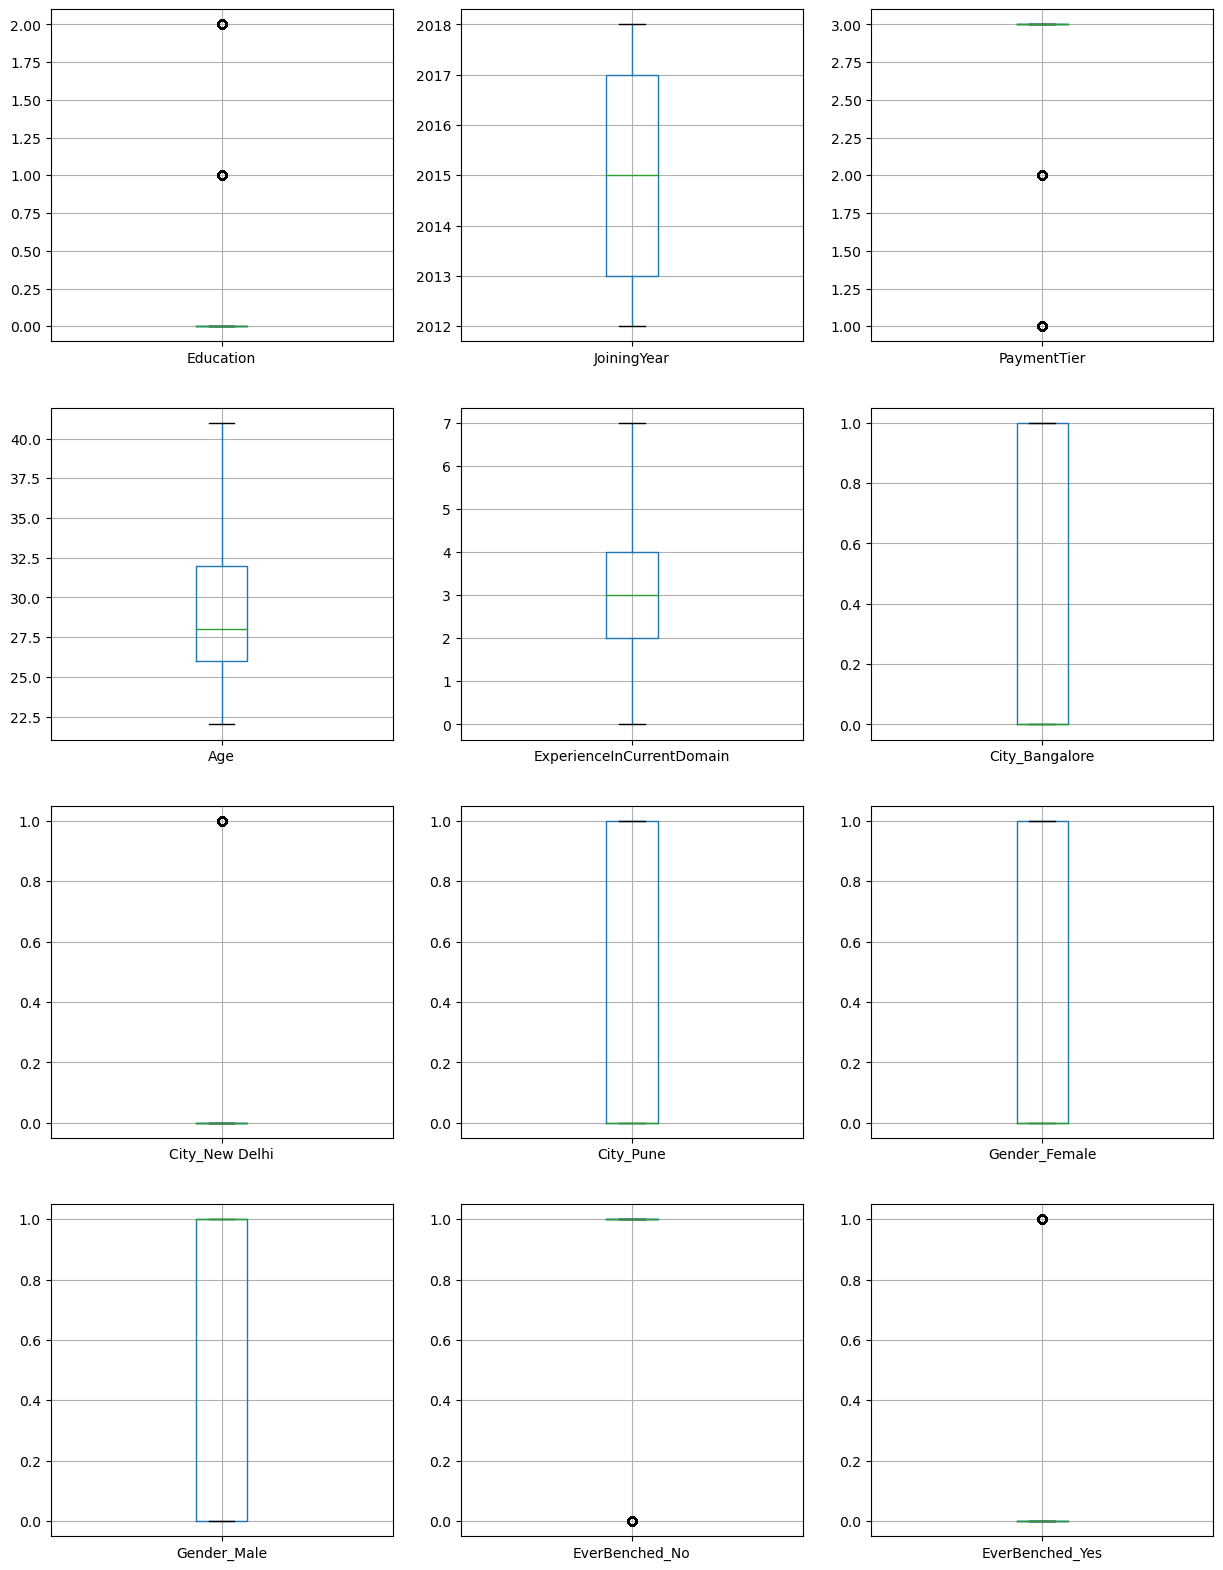

In [49]:
plt.figure(figsize=(15,25))
i=1
for col in x.columns:
    plt.subplot(5,3,i)
    x[[col]].boxplot()
    i+=1

In [50]:
x.skew()

Education                    1.848096
JoiningYear                 -0.113462
PaymentTier                 -1.709531
Age                          0.905195
ExperienceInCurrentDomain   -0.162556
City_Bangalore               0.084780
City_New Delhi               1.163370
City_Pune                    1.022167
Gender_Female                0.395787
Gender_Male                 -0.395787
EverBenched_No              -2.617865
EverBenched_Yes              2.617865
dtype: float64

In [51]:
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [52]:
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [53]:
x_train_scaled

,Education,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,0.0,0.000000,1.0,0.210526,0.571429,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.166667,1.0,0.263158,0.714286,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.000000,1.0,0.210526,0.571429,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.166667,1.0,0.210526,0.571429,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.166667,0.5,0.105263,0.285714,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4182,0.0,0.500000,0.5,0.105263,0.285714,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4183,0.0,0.666667,1.0,0.105263,0.285714,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4184,0.0,0.166667,1.0,0.315789,0.142857,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4185,0.0,0.500000,0.5,0.789474,0.428571,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [58]:
from sklearn.neighbors import KNeighborsClassifier
acc_data_tr = []
acc_data_ts = []
for i in range(1,15):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train_scaled,y_train)
    acc_tr = knn_model.score(x_train_scaled,y_train)
    acc_ts = knn_model.score(x_test_scaled,y_test)
    acc_data_tr.append(acc_tr)
    acc_data_ts.append(acc_ts)

C:\Users\kiran\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kiran\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kiran\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kiran\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [55]:
acc_data_tr

[0.8932409839980894,
 0.8727012180558873,
 0.8738953904943874,
 0.8559828039168856,
 0.8559828039168856,
 0.850728445187485,
 0.8481012658227848,
 0.8375925483639838,
 0.840219727728684,
 0.8332935275853833,
 0.8313828516837831,
 0.8297110102698829,
 0.8323381896345833,
 0.8292333412944829]

In [56]:
acc_data_ts

[0.7811158798283262,
 0.8369098712446352,
 0.8197424892703863,
 0.8304721030042919,
 0.8412017167381974,
 0.8390557939914163,
 0.8283261802575107,
 0.8304721030042919,
 0.8326180257510729,
 0.8326180257510729,
 0.8326180257510729,
 0.8390557939914163,
 0.8304721030042919,
 0.8240343347639485]

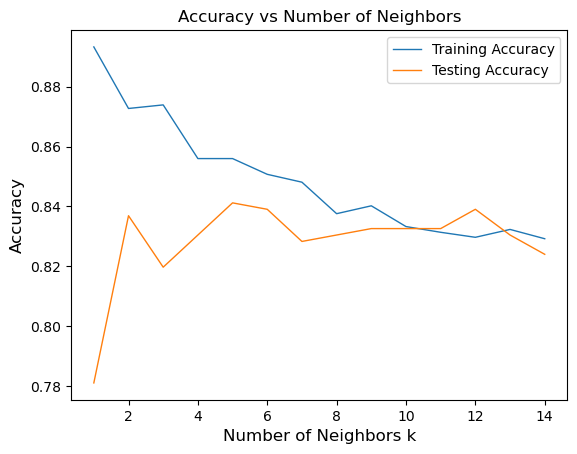

In [59]:
plt.plot(range(1,15),acc_data_tr,  linewidth=1, markersize=5,label='Training Accuracy')
plt.plot(range(1,15),acc_data_ts,  linewidth=1, markersize=5,label='Testing Accuracy')
plt.title("Accuracy vs Number of Neighbors",fontsize=12)
plt.xlabel("Number of Neighbors k", fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.legend()
plt.show()

In [60]:
# Take k=4 
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=4)

In [61]:
y_pred = knn.predict(x_test_scaled)
y_pred_tr = knn.predict(x_train_scaled)

C:\Users\kiran\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kiran\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [62]:
print("Accuracy on Test Data:",accuracy_score(y_test,y_pred))
print("Accuracy on Train Data:",accuracy_score(y_train,y_pred_tr))

Accuracy on Test Data: 0.8304721030042919
Accuracy on Train Data: 0.8559828039168856


In [63]:
print("---Model Performance on Test Data---")
print()
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))

---Model Performance on Test Data---

Confusion Matrix:
 [[289  16]
 [ 63  98]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88       305
           1       0.86      0.61      0.71       161

    accuracy                           0.83       466
   macro avg       0.84      0.78      0.80       466
weighted avg       0.83      0.83      0.82       466



In [64]:
y_pred[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [65]:
y_test.values[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [66]:
y_prob = knn.predict_proba(x_test_scaled)
#y_prob

In [67]:
fpr,tpr,threshold = roc_curve(y_test,y_prob[:,1])
print("ROC-AUC:",auc(fpr,tpr))

ROC-AUC: 0.8354851848080644


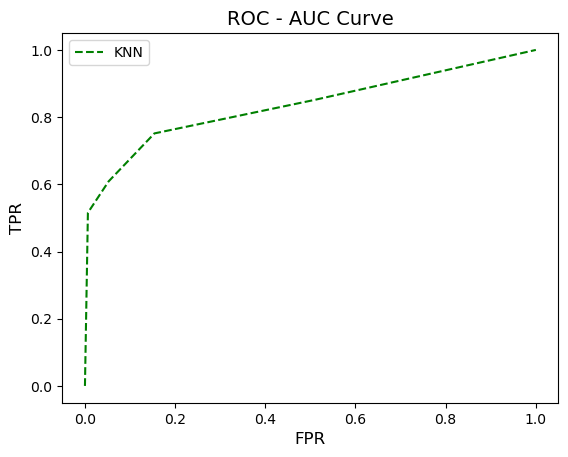

In [68]:
plt.plot(fpr,tpr,linestyle='--',color='green', label='KNN')
plt.title("ROC - AUC Curve",fontsize=14)
plt.xlabel("FPR",fontsize=12)
plt.ylabel("TPR",fontsize=12)
plt.legend()
plt.show()

In [69]:
p,r,t = precision_recall_curve(y_test,y_prob[:,1])
print("PR - AUC :",auc(r,p))

PR - AUC : 0.8276678223889586


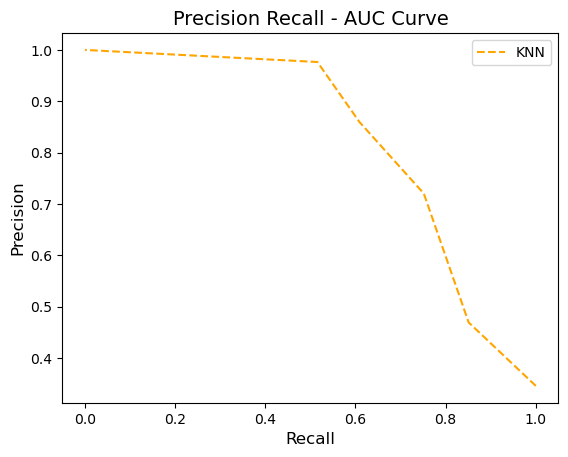

In [70]:
plt.plot(r, p ,linestyle='--',color='orange', label='KNN')
plt.title("Precision Recall - AUC Curve",fontsize=14)
plt.xlabel("Recall",fontsize=12)
plt.ylabel("Precision",fontsize=12)
plt.legend()
plt.show()